In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [4]:
df.duplicated().sum()

120

In [5]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,house,independent,sector 23,2.8,161849.0,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 sq.ft. (14.86 sq.m.)Carpet area: 150 sq.ft. (13.94 sq.m.),5,5,3+,pooja room,2.0,North-East,10+ Year Old,"['HUDA Sector 23 Market', 'Palam triangle', 'Palam Vihar Vyapar kendra', 'Ram Mandir', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Metro Hospital and Heart Institute Gurgaon', 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Big Cinemas', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Moti Mahal', 'Pind Baluchi', 'Pizza Hut', ""Domino's Pizza"", 'Cafe Coffee Day', 'Om Sweets', ""McDonald's"", 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'Chiranjiv Bharati School', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['6 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']"


In [6]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2510,0.65,1526.0,Carpet area: 1526 (141.77 sq.m.)
2610,1.10,1300.0,Super Built up area 1300(120.77 sq.m.)Carpet area: 788 sq.ft. (73.21 sq.m.)
2843,1.60,1929.0,Super Built up area 1929(179.21 sq.m.)
3625,2.40,2579.0,Super Built up area 2579(239.6 sq.m.)Carpet area: 2100 sq.ft. (195.1 sq.m.)
1423,2.10,1800.0,Super Built up area 1800(167.23 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.)


In [7]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [8]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [9]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [10]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [11]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2390,3.25,flat,2298.0,Carpet area: 2298 (213.49 sq.m.),NaN,NaN,2298.0
3784,1.75,flat,1676.0,Super Built up area 1580(146.79 sq.m.),1580.0,NaN,NaN
1909,0.65,flat,1350.0,Super Built up area 1350(125.42 sq.m.),1350.0,NaN,NaN
870,1.44,flat,2037.0,Carpet area: 2040 (189.52 sq.m.),NaN,NaN,2040.0
382,4.25,flat,3880.0,Super Built up area 3880(360.46 sq.m.),3880.0,NaN,NaN


In [12]:
df.duplicated().sum()

120

In [13]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [14]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
0,2.8,house,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 sq.ft. (14.86 sq.m.)Carpet area: 150 sq.ft. (13.94 sq.m.),NaN,160.0,150.0
9,9.0,house,4235.0,Plot area 5605(520.72 sq.m.)Built Up area: 5200 sq.ft. (483.1 sq.m.)Carpet area: 4235 sq.ft. (393.44 sq.m.),NaN,5200.0,4235.0
14,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
15,11.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
18,5.5,house,1000.0,Plot area 1000(92.9 sq.m.),NaN,NaN,NaN


In [15]:
df.isnull().sum()


property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [16]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [17]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,4.5,house,1350.0,Plot area 150(125.42 sq.m.),NaN,NaN,NaN
15,11.0,house,3240.0,Plot area 360(301.01 sq.m.),NaN,NaN,NaN
18,5.5,house,1000.0,Plot area 1000(92.9 sq.m.),NaN,NaN,NaN
20,8.0,house,3600.0,Plot area 400(334.45 sq.m.),NaN,NaN,NaN
23,1.3,house,1125.0,Plot area 1125(104.52 sq.m.),NaN,NaN,NaN


In [18]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [19]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [20]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,150.00,NaN
15,11.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
18,5.50,house,1000.0,Plot area 1000(92.9 sq.m.),NaN,1000.00,NaN
20,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,400.00,NaN
23,1.30,house,1125.0,Plot area 1125(104.52 sq.m.),NaN,1125.00,NaN
24,3.15,house,1548.0,Plot area 172(143.81 sq.m.),NaN,172.00,NaN
27,1.35,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,1350.00,NaN
31,9.85,house,3323.0,Plot area 418(349.5 sq.m.),NaN,418.00,NaN
35,5.00,house,215517.0,Plot area 2(1011.71 sq.m.),NaN,2.00,NaN
55,3.65,house,1557.0,Plot area 173(144.65 sq.m.),NaN,173.00,NaN


In [21]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [22]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
14,4.50,house,1350.0,Plot area 150(125.42 sq.m.),NaN,1350.00,NaN
15,11.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
18,5.50,house,1000.0,Plot area 1000(92.9 sq.m.),NaN,1000.00,NaN
20,8.00,house,3600.0,Plot area 400(334.45 sq.m.),NaN,3600.00,NaN
23,1.30,house,1125.0,Plot area 1125(104.52 sq.m.),NaN,1125.00,NaN
24,3.15,house,1548.0,Plot area 172(143.81 sq.m.),NaN,1548.00,NaN
27,1.35,house,1350.0,Plot area 1350(125.42 sq.m.),NaN,1350.00,NaN
31,9.85,house,3323.0,Plot area 418(349.5 sq.m.),NaN,418.00,NaN
35,5.00,house,215517.0,Plot area 2(1011.71 sq.m.),NaN,2.00,NaN
55,3.65,house,1557.0,Plot area 173(144.65 sq.m.),NaN,1557.00,NaN


In [23]:
# update the original dataframe
df.update(all_nan_df)
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [24]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,house,independent,sector 23,2.80,161849.0,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 sq.ft. (14.86 sq.m.)Carpet area: 150 sq.ft. (13.94 sq.m.),5,5,3+,pooja room,2.0,North-East,10+ Year Old,"['HUDA Sector 23 Market', 'Palam triangle', 'Palam Vihar Vyapar kendra', 'Ram Mandir', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Metro Hospital and Heart Institute Gurgaon', 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Big Cinemas', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Moti Mahal', 'Pind Baluchi', 'Pizza Hut', ""Domino's Pizza"", 'Cafe Coffee Day', 'Om Sweets', ""McDonald's"", 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'Chiranjiv Bharati School', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['6 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",NaN,160.0,150.0
1,flat,dlf regency park,sector 28,1.24,12400.0,1000.0,Super Built up area 1150(106.84 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,3+,pooja room,19.0,South,5 to 10 Year Old,"['Sector 42-43 metro station', 'Dlf phase 1 metro station', 'Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Hdfc bank ATM', 'Marwah Clinic', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Gupta', 'Max Hospital', 'The Dental Lounge', 'Dr. Kutbuddin Akbary', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Axis bank', 'Icici bank', 'Hdfc bank', 'The Chicken Boat', 'Balaji Vegetarian Paradise', 'Nowhere Brewpub and cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Fat', 'Dighent cafe', 'Drunken Monkey', 'Belgian Waffle', 'CCD', 'Naveidyam', 'Sagar Ratna', 'Shophouse by Kylin', 'PWO house', 'Cafe Tonini', ""Carl's Jr."", 'Starbucks', 'Stones2milestones', 'Ncr library', 'Bahrisons library']","['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1150.0,1050.0,1000.0
2,flat,tulip violet,sector 69,1.76,8756.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,not available,6.0,North,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio School', 'DPG Institute of Technology', 'Ektaa Hospitals', 'Indira Ga

In [25]:
df['additionalRoom'].value_counts()


additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [26]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [27]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
3584,not available,0,0,0,0,0
1695,not available,0,0,0,0,0
2089,servant room,0,1,0,0,0
1044,study room,1,0,0,0,0
3292,not available,0,0,0,0,0


In [28]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 23,2.80,161849.0,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 sq.ft. (14.86 sq.m.)Carpet area: 150 sq.ft. (13.94 sq.m.),5,5,3+,pooja room,2.0,North-East,10+ Year Old,"['HUDA Sector 23 Market', 'Palam triangle', 'Palam Vihar Vyapar kendra', 'Ram Mandir', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Metro Hospital and Heart Institute Gurgaon', 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Big Cinemas', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Moti Mahal', 'Pind Baluchi', 'Pizza Hut', ""Domino's Pizza"", 'Cafe Coffee Day', 'Om Sweets', ""McDonald's"", 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'Chiranjiv Bharati School', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['6 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",NaN,160.0,150.0,0,0,0,1,0
1,flat,dlf regency park,sector 28,1.24,12400.0,1000.0,Super Built up area 1150(106.84 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,3+,pooja room,19.0,South,5 to 10 Year Old,"['Sector 42-43 metro station', 'Dlf phase 1 metro station', 'Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Hdfc bank ATM', 'Marwah Clinic', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Gupta', 'Max Hospital', 'The Dental Lounge', 'Dr. Kutbuddin Akbary', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Axis bank', 'Icici bank', 'Hdfc bank', 'The Chicken Boat', 'Balaji Vegetarian Paradise', 'Nowhere Brewpub and cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Fat', 'Dighent cafe', 'Drunken Monkey', 'Belgian Waffle', 'CCD', 'Naveidyam', 'Sagar Ratna', 'Shophouse by Kylin', 'PWO house', 'Cafe Tonini', ""Carl's Jr."", 'Starbucks', 'Stones2milestones', 'Ncr library', 'Bahrisons library']","['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1150.0,1050.0,1000.0,0,0,0,1,0
2,flat,tulip violet,sector 69,1.76,8756.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,not available,6.0,North,1 to 5 Year Old,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Impe

In [29]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Jun 2024                 7
Aug 2023                 7
Dec 2025                 7
Nov 2023                 5
By 2025                  4
Oct 2023                 4
Sep 2023                 4
Jul 2024                 4
Aug 2024                 4
Feb 2024                 3
Jan 2025                 3
May 2024                 3
Nov 2024                 3
Jun 2027                 2
Sep 2025                 2
Jul 2025                 2
By 2027                  2
Jul 2027                 2
Jan 2026                 2
Aug 2025                 2
Dec 2026                 2
Apr 2026      

In [30]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [31]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [32]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [33]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,house,independent,sector 23,2.80,161849.0,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 sq.ft. (14.86 sq.m.)Carpet area: 150 sq.ft. (13.94 sq.m.),5,5,3+,pooja room,2.0,North-East,Old Property,"['HUDA Sector 23 Market', 'Palam triangle', 'Palam Vihar Vyapar kendra', 'Ram Mandir', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Metro Hospital and Heart Institute Gurgaon', 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Big Cinemas', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Moti Mahal', 'Pind Baluchi', 'Pizza Hut', ""Domino's Pizza"", 'Cafe Coffee Day', 'Om Sweets', ""McDonald's"", 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'Chiranjiv Bharati School', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['6 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",NaN,160.0,150.0,0,0,0,1,0
1,flat,dlf regency park,sector 28,1.24,12400.0,1000.0,Super Built up area 1150(106.84 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,3+,pooja room,19.0,South,Moderately Old,"['Sector 42-43 metro station', 'Dlf phase 1 metro station', 'Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Hdfc bank ATM', 'Marwah Clinic', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Gupta', 'Max Hospital', 'The Dental Lounge', 'Dr. Kutbuddin Akbary', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Axis bank', 'Icici bank', 'Hdfc bank', 'The Chicken Boat', 'Balaji Vegetarian Paradise', 'Nowhere Brewpub and cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Fat', 'Dighent cafe', 'Drunken Monkey', 'Belgian Waffle', 'CCD', 'Naveidyam', 'Sagar Ratna', 'Shophouse by Kylin', 'PWO house', 'Cafe Tonini', ""Carl's Jr."", 'Starbucks', 'Stones2milestones', 'Ncr library', 'Bahrisons library']","['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']",1150.0,1050.0,1000.0,0,0,0,1,0
2,flat,tulip violet,sector 69,1.76,8756.0,2010.0,Super Built up area 2010(186.74 sq.m.),4,4,2,not available,6.0,North,Relatively New,"['Airia Mall Sector 68', 'Southern Peripheral Road', 'Golf Course Extension Rd', 'Imperio

In [34]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
831,"['5 Wardrobe', '10 Fan', '1 Exhaust Fan', '6 Geyser', '10 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']"
3463,"['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '17 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', '5 AC', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
1776,"['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Club house / Community Center']"
414,"['6 AC', '1 Chimney', '1 Modular Kitchen', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1452,"['1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",NaN


In [35]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]
furnishings_df.shape

<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Ansh\AppData\Local\Temp\ipykernel_1828\2221956616.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


(3803, 19)

In [36]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\Ansh\AppData\Local\Temp\ipykernel_1828\114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [37]:
furnishings_df.sample(5)

,Bed,Curtains,Fridge,AC,Fan,Light,Wardrobe,Dining Table,Water Purifier,Sofa,TV,Modular Kitchen,Microwave,Stove,Exhaust Fan,Chimney,Washing Machine,Geyser
2231,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1840,0,12,0,12,12,75,12,0,1,0,0,1,4,1,1,4,0,12
1447,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
34,0,0,0,0,0,12,3,0,0,0,0,1,0,0,0,1,0,4
3095,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [39]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [40]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

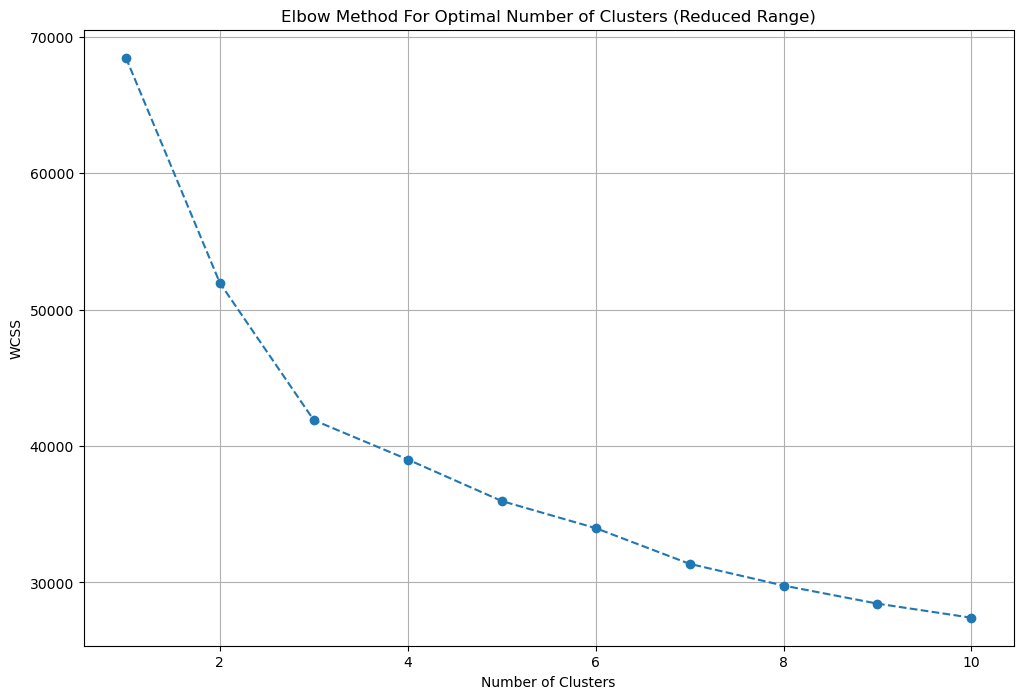

In [41]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [42]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [43]:
df = df.iloc[:,:-18]
df['furnishing_type'] = cluster_assignments
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1683,NaN,0
2742,"['6 Wardrobe', '1 Fridge', '8 Fan', '1 Exhaust Fan', '1 Microwave', '1 Stove', '24 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
1951,[],0
3591,"['5 Fan', '1 Exhaust Fan', '1 Geyser', '6 Light', '1 Chimney', '3 Wardrobe', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",2
3609,"['5 Fan', '1 Exhaust Fan', '17 Light', '5 AC', '1 Modular Kitchen', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Geyser', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",2


In [44]:
df[['society','features']].sample(5)

,society,features
3267,experion windchants,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Internet/wi-fi connectivity', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2621,dlf city plots phase 3,['Park']
2734,independent,"['Private Garden / Terrace', 'Swimming Pool', 'Water Storage', 'Park', 'Visitor Parking']"
3579,sare crescent parc,"['Intercom Facility', 'Lift(s)', 'Park']"
221,unitech escape,NaN


In [45]:
df['features'].isnull().sum()

635

In [46]:
import pandas as pd
app_df = pd.read_csv('appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [47]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [48]:
temp_df = df[df['features'].isnull()]
temp_df.shape

(635, 26)

In [49]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [50]:
df.loc[temp_df.index,'features'] = x.values

In [51]:
df['features'].isnull().sum()

481

In [52]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [53]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
3552,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3731,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3031,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0
1816,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
2096,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [54]:
features_binary_df.shape

(3803, 130)

In [55]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

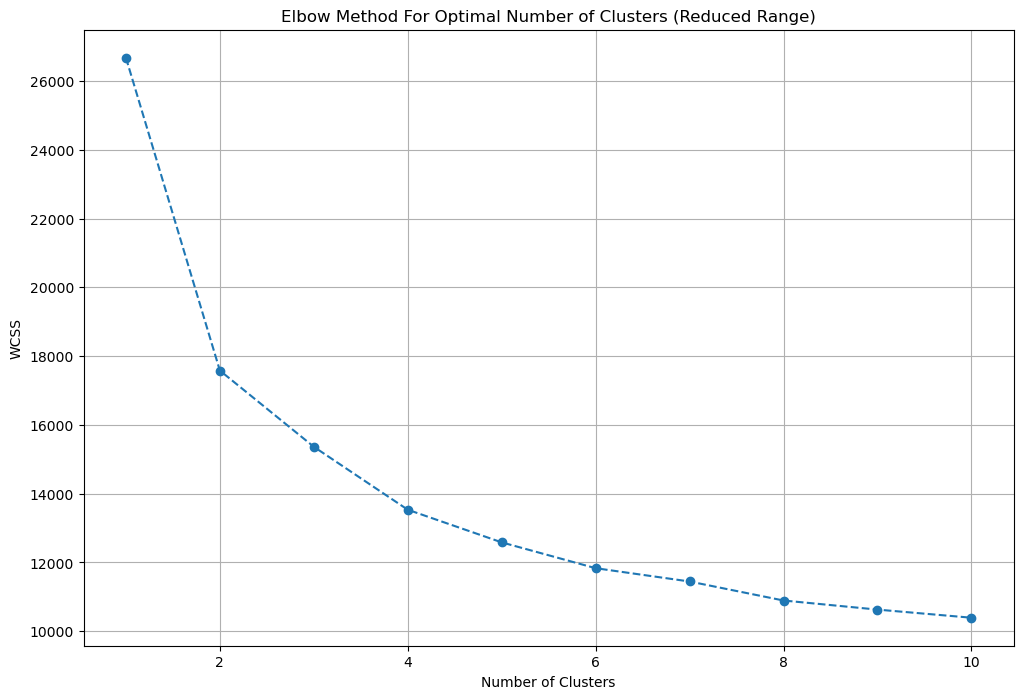

In [56]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [57]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [58]:
df['luxury_score'] = luxury_score
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,house,independent,sector 23,2.80,161849.0,173.0,Plot area 173(16.07 sq.m.)Built Up area: 160 sq.ft. (14.86 sq.m.)Carpet area: 150 sq.ft. (13.94 sq.m.),5,5,3+,pooja room,2.0,North-East,Old Property,"['HUDA Sector 23 Market', 'Palam triangle', 'Palam Vihar Vyapar kendra', 'Ram Mandir', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Metro Hospital and Heart Institute Gurgaon', 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Big Cinemas', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Moti Mahal', 'Pind Baluchi', 'Pizza Hut', ""Domino's Pizza"", 'Cafe Coffee Day', 'Om Sweets', ""McDonald's"", 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'Chiranjiv Bharati School', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['6 Wardrobe', '8 Fan', '1 Exhaust Fan', '4 Geyser', '12 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Recently Renovated', 'Piped-gas', 'Visitor Parking', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal']",NaN,160.0,150.0,0,0,0,1,0,2,"[Feng Shui / Vaastu Compliant, Private Garden / Terrace, False Ceiling Lighting, Water Storage, No open drainage around, Recently Renovated, Piped-gas, Visitor Parking, Park, Natural Light, Airy Rooms, Spacious Interiors, Low Density Society, Waste Disposal]",74
1,flat,dlf regency park,sector 28,1.24,12400.0,1000.0,Super Built up area 1150(106.84 sq.m.)Built Up area: 1050 sq.ft. (97.55 sq.m.)Carpet area: 1000 sq.ft. (92.9 sq.m.),2,2,3+,pooja room,19.0,South,Moderately Old,"['Sector 42-43 metro station', 'Dlf phase 1 metro station', 'Huda city centre metro station', 'New Life Church', 'Hanuman Mandir', 'Rbs ATM', 'Kotak mahindra bank ATM', 'Standard chartered ATM', 'Hdfc ATM', 'Hdfc bank ATM', 'Marwah Clinic', 'Paras Hospital Gurgaon', 'Sitaram Bhartia', 'Gupta', 'Max Hospital', 'The Dental Lounge', 'Dr. Kutbuddin Akbary', 'Arihant Hospital', 'Dr. Naval Mendiratta', 'Fortis Memorial Research Institute Fortis Vivekanand Hospital', 'Guardian Pharmacy', 'Chikitsa', 'Bharat petroleum', 'Axis bank', 'Icici bank', 'Hdfc bank', 'The Chicken Boat', 'Balaji Vegetarian Paradise', 'Nowhere Brewpub and cafe', 'Blue Tokai Coffee Roasters', 'Starbucks', 'Fat', 'Dighent cafe', 'Drunken Monkey', 'Belgian Waffle', 'CCD', 'Naveidyam', 'Sagar Ratna', 'Shophouse by Kylin', 'PWO house', 'Cafe Tonini', ""Carl's Jr."", 'Starbucks', 'Stones2milestones', 'Ncr library', 'Bahrisons library']","['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '3 Geyser', '10 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fi

In [59]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [60]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3144,flat,puri diplomatic greens,sector 111,2.25,13235.0,1700.0,Super Built up area 1700(157.94 sq.m.),3,3,2,12.0,North-East,Relatively New,1700.00,NaN,NaN,0,0,0,0,0,0,101
2144,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,10529.0,1852.0,Super Built up area 1852(172.06 sq.m.),3,3,3,10.0,North-East,Relatively New,1852.00,NaN,NaN,0,0,0,0,0,0,59
1709,flat,vatika iris floors,sector 82,0.63,5590.0,1127.0,Super Built up area 1134(105.35 sq.m.),2,2,3+,2.0,East,Relatively New,1134.00,NaN,NaN,1,0,0,0,0,0,110
3002,flat,sahara grace,sector 28,4.30,12420.0,3462.0,Super Built up area 3462.01(321.63 sq.m.),3,4,3,5.0,NaN,Old Property,3462.01,NaN,NaN,0,1,1,0,0,0,24
1719,flat,pareena laxmi apartments,sector 99a,0.32,5786.0,553.0,Super Built up area 553(51.38 sq.m.)Carpet area: 453.5 sq.ft. (42.13 sq.m.),2,2,2,11.0,NaN,New Property,553.00,NaN,453.5,0,0,0,0,0,0,66


In [61]:
df.shape

(3803, 23)

In [62]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)